In [ ]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf

def shape_change(x, y):
    x = x.reshape((-1, 3072)).astype(np.float32)
    y = (np.arange(10) == y).astype(np.float32)
    return x, y

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#x_train, x_test = x_train, x_test
copy_x_test = x_test[0:11]
copy_y_test = y_test[0:11]
x_train, x_test = x_train/255.0, x_test/255.0
x_train, y_train = shape_change(x_train, y_train)
x_test, y_test = shape_change(x_test, y_test)



[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


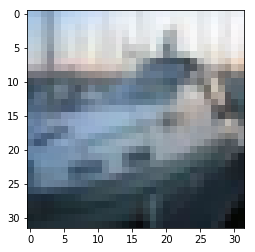

In [2]:
regularization_method = 2 #0 nic | 2 L2
epochs = 100
layers = 5 # 2 | 5 | 10
optimalization_method = 0 #0 Adam | 1 Adagrad | 2 Adadelta 
train_size = 30000
test_size = 1000

x_train = x_train[:train_size]
y_train = y_train[:train_size]
x_test = x_test[:test_size]
y_test = y_test[:test_size]


%matplotlib inline
import pylab
pylab.imshow(copy_x_test[2])
print(y_test[2])

learning_rate = 0.001
batch_size = 1000
show_steps = 1



In [3]:
if layers == 2:
    hidden_1 = 256 
    hidden_2 = 256 
    X = tf.placeholder(tf.float32, shape=(batch_size, 3072))
    Y = tf.placeholder(tf.float32, shape=(batch_size, 10))

    weights = {
        'h1': tf.Variable(tf.random_normal([3072, hidden_1]), name='w1'),
        'h2': tf.Variable(tf.random_normal([hidden_1, hidden_2]), name='w2'),
        'out': tf.Variable(tf.random_normal([hidden_2, 10]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hidden_1])),
        'b2': tf.Variable(tf.random_normal([hidden_2])),
        'out': tf.Variable(tf.random_normal([10]))
    }

    def Deep_Network(data):

        layer_1 = tf.add(tf.matmul(data, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer


In [17]:
if layers == 5:
    hidden_1 = 1024 
    hidden_2 = 512
    hidden_3 = 256
    hidden_4 = 128
    hidden_5 = 64

    X = tf.placeholder(tf.float32, shape=(None, 3072))#(batch_size, 3072))
    Y = tf.placeholder(tf.float32, shape=(None, 10))#(batch_size, 10))

    weights = {
        'h1': tf.Variable(tf.random_normal([3072, hidden_1]), name='w1'),
        'h2': tf.Variable(tf.random_normal([hidden_1, hidden_2]), name='w2'),
        'h3': tf.Variable(tf.random_normal([hidden_2, hidden_3]), name='w3'),
        'h4': tf.Variable(tf.random_normal([hidden_3, hidden_4]), name='w4'),
        'h5': tf.Variable(tf.random_normal([hidden_4, hidden_5]), name='w5'),
        'out': tf.Variable(tf.random_normal([hidden_5, 10]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hidden_1])),
        'b2': tf.Variable(tf.random_normal([hidden_2])),
        'b3': tf.Variable(tf.random_normal([hidden_3])),
        'b4': tf.Variable(tf.random_normal([hidden_4])),
        'b5': tf.Variable(tf.random_normal([hidden_5])),
        'out': tf.Variable(tf.random_normal([10]))
    }

    regularizer_L1 = tf.contrib.layers.l1_regularizer(scale=0.1)
    regularizer_L2 = tf.contrib.layers.l2_regularizer(scale=0.1)


    def Deep_Network(data):

        layer_1 = tf.add(tf.matmul(data, weights['h1']), biases['b1'])
        layer_1 = tf.nn.sigmoid(layer_1)
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.sigmoid(layer_2)
        layer_2 = tf.nn.dropout(layer_2,0.8)
        layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
        layer_3 = tf.nn.sigmoid(layer_3)
        layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
        layer_4 = tf.nn.sigmoid(layer_4)
        layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
        layer_5 = tf.nn.sigmoid(layer_5)
        out_layer = tf.matmul(layer_5, weights['out']) + biases['out']
        return out_layer

In [5]:
if layers == 10:
    hidden_1 = 256 
    hidden_2 = 256 
    hidden_3 = 256
    hidden_4 = 256
    hidden_5 = 256
    hidden_6 = 256
    hidden_7 = 256
    hidden_8 = 256
    hidden_9 = 256
    hidden_10 = 256

    X = tf.placeholder(tf.float32, shape=(batch_size, 3072))
    Y = tf.placeholder(tf.float32, shape=(batch_size, 10))

    weights = {
        'h1': tf.Variable(tf.random_normal([3072, hidden_1]), name='w1'),
        'h2': tf.Variable(tf.random_normal([hidden_1, hidden_2]), name='w2'),
        'h3': tf.Variable(tf.random_normal([hidden_2, hidden_3]), name='w3'),
        'h4': tf.Variable(tf.random_normal([hidden_3, hidden_4]), name='w4'),
        'h5': tf.Variable(tf.random_normal([hidden_4, hidden_5]), name='w5'),
        'h6': tf.Variable(tf.random_normal([hidden_5, hidden_6]), name='w6'),
        'h7': tf.Variable(tf.random_normal([hidden_6, hidden_7]), name='w7'),
        'h8': tf.Variable(tf.random_normal([hidden_7, hidden_8]), name='w8'),
        'h9': tf.Variable(tf.random_normal([hidden_8, hidden_9]), name='w9'),
        'h10': tf.Variable(tf.random_normal([hidden_9, hidden_10]), name='w10'),
        'out': tf.Variable(tf.random_normal([hidden_10, 10]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hidden_1])),
        'b2': tf.Variable(tf.random_normal([hidden_2])),
        'b3': tf.Variable(tf.random_normal([hidden_3])),
        'b4': tf.Variable(tf.random_normal([hidden_4])),
        'b5': tf.Variable(tf.random_normal([hidden_5])),
        'b6': tf.Variable(tf.random_normal([hidden_6])),
        'b7': tf.Variable(tf.random_normal([hidden_7])),
        'b8': tf.Variable(tf.random_normal([hidden_8])),
        'b9': tf.Variable(tf.random_normal([hidden_9])),
        'b10': tf.Variable(tf.random_normal([hidden_10])),
        'out': tf.Variable(tf.random_normal([10]))
    }

    regularizer_L1 = tf.contrib.layers.l1_regularizer(scale=0.1)
    regularizer_L2 = tf.contrib.layers.l2_regularizer(scale=0.1)

    def Deep_Network(data):

        layer_1 = tf.add(tf.matmul(data, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2)
        layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
        layer_3 = tf.nn.relu(layer_3)
        layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
        layer_4 = tf.nn.relu(layer_4)
        layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
        layer_5 = tf.nn.relu(layer_5)
        layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
        layer_6 = tf.nn.relu(layer_6)
        layer_7 = tf.add(tf.matmul(layer_6, weights['h7']), biases['b7'])
        layer_7 = tf.nn.relu(layer_7)
        layer_8 = tf.add(tf.matmul(layer_7, weights['h8']), biases['b8'])
        layer_8 = tf.nn.relu(layer_8)
        layer_9 = tf.add(tf.matmul(layer_8, weights['h9']), biases['b9'])
        layer_9 = tf.nn.relu(layer_9)
        layer_10 = tf.add(tf.matmul(layer_9, weights['h10']), biases['b10'])
        layer_10 = tf.nn.relu(layer_10)
        out_layer = tf.matmul(layer_10, weights['out']) + biases['out']
        return out_layer

In [18]:
#########################################################################################
logits = Deep_Network(X)

#loss = tf.reduce_mean(loss + beta * regularizer)
#loss = (tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
#    logits=out_layer, labels=tf_train_labels)) +
#    0.01*tf.nn.l2_loss(hidden_weights) +
#    0.01*tf.nn.l2_loss(out_weights))


if regularization_method == 0 :   
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    
if regularization_method == 2 :
    variabl = tf.trainable_variables() 
    lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in variabl if 'w' in v.name ]) * 0.001
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y) + lossL2)
 

if optimalization_method == 0 :
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
if optimalization_method == 1 :
    optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
if optimalization_method == 2 :
    optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss_op)


init = tf.global_variables_initializer()

pred = tf.nn.softmax(logits)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
a1 = tf.argmax(Y,1)
a2 = tf.argmax(logits,1)
confusion_matrix = tf.confusion_matrix(labels = a1, predictions = a2)

wykres_acc1 = []
cost_list = []
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        avg_cost = 0.0
        total_batch = int(train_size/batch_size)

        for i in range(total_batch): #trenowanie batchy
            batch_x, batch_y = x_train[batch_size * i : batch_size * (i + 1)], y_train[batch_size * i : batch_size * (i + 1)]

            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
            avg_cost += c / total_batch #koszt
            

        if epoch % show_steps == 0:
            
            print("Epoch:", (epoch+1), "cost={:.2f}".format(avg_cost))
            cost_list.append(avg_cost)
            acc1 = accuracy.eval({X: x_test, Y: y_test})
            wykres_acc1.append(acc1)
            print("Accuracy:", acc1)

    acc1 = accuracy.eval({X: x_test, Y: y_test})
    wykres_acc1.append(acc1)
    print("End accuracy:", acc1)
    
   
    
    print(confusion_matrix.eval({X: x_test, Y: y_test}))
    #print(tf.contrib.metrics.confusion_matrix([1, 2, 4], [2, 2, 4])) #??????https://stackoverflow.com/questions/43051687/how-to-create-confusion-matrix-for-classification-in-tensorflow
    #with tf.Session() as sess:
    #pred_acc = tf.argmax(pred, 1)
    #label_met = tf.argmax(Y, 1)
    #print(pred_acc)
    #print(label_met)
    print(logits)
    print(Y)

    #print(confusion_matrix.eval())

    #val_accuracy, y_pred = sess.run([accuracy, label_met], feed_dict={X:x_test, Y:y_test})
    #confusion_matrix = tf.contrib.metrics.confusion_matrix(labels = label_met, predictions = pred_acc)
    #confusion_matrix_to_Print = sess.run(confusion_matrix)
    #print(confusion_matrix_to_Print)

    #sess = tf.Session()
    #with sess.as_default():
    #    print(sess.run(confusion_matrix))


    #with tf.Session() as sess:
    #    sess.run(init)
    #    print(confusion_matrix.eval())


Epoch: 1 cost=3766.30
Accuracy: 0.106
Epoch: 2 cost=3598.74
Accuracy: 0.132
Epoch: 3 cost=3437.66
Accuracy: 0.13
Epoch: 4 cost=3283.23
Accuracy: 0.125
Epoch: 5 cost=3135.47
Accuracy: 0.143
Epoch: 6 cost=2994.24
Accuracy: 0.155
Epoch: 7 cost=2859.32
Accuracy: 0.155
Epoch: 8 cost=2730.49
Accuracy: 0.175
Epoch: 9 cost=2607.49
Accuracy: 0.178
Epoch: 10 cost=2490.05
Accuracy: 0.166
Epoch: 11 cost=2377.94
Accuracy: 0.217
Epoch: 12 cost=2270.93
Accuracy: 0.226
Epoch: 13 cost=2168.74
Accuracy: 0.211
Epoch: 14 cost=2071.20
Accuracy: 0.255
Epoch: 15 cost=1978.05
Accuracy: 0.234
Epoch: 16 cost=1889.11
Accuracy: 0.232
Epoch: 17 cost=1804.17
Accuracy: 0.228
Epoch: 18 cost=1723.04
Accuracy: 0.254
Epoch: 19 cost=1645.54
Accuracy: 0.253
Epoch: 20 cost=1571.51
Accuracy: 0.268
Epoch: 21 cost=1500.80
Accuracy: 0.277
Epoch: 22 cost=1433.24
Accuracy: 0.267
Epoch: 23 cost=1368.68
Accuracy: 0.264
Epoch: 24 cost=1307.01
Accuracy: 0.273
Epoch: 25 cost=1248.07
Accuracy: 0.278
Epoch: 26 cost=1191.75
Accuracy: 0.

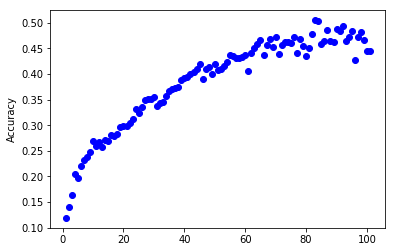

In [7]:
%matplotlib inline
import pylab
x = list(range(1, epoch+3))
y = wykres_acc1
pylab.ylabel('Accuracy')
pylab.plot(x,y,'bo', label='')
pylab.show()

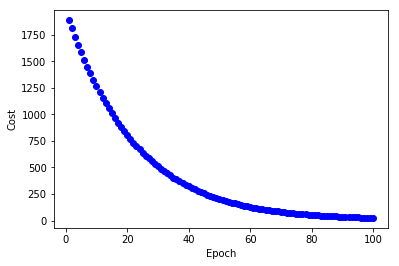

In [8]:
%matplotlib inline
import pylab
x = list(range(1, epoch+2 ) )
y = cost_list
pylab.xlabel('Epoch')
pylab.ylabel('Cost')
pylab.plot(x,y,'bo', label='')
pylab.show()

True class:  [8]
1.0
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]]
Class probability:  [[3.1266403e-03 3.3920526e-03 5.6741510e-06 5.4547381e-06 1.6256422e-04
  6.5986702e-04 1.1340605e-05 1.7007494e-03 9.9093401e-01 1.6404074e-06]]
Model output  [ True]


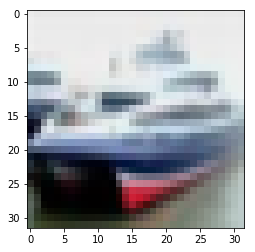

In [11]:
#airplane automobile bird cat deer dog frog horse ship truck
%matplotlib inline
import pylab

pylab.imshow(copy_x_test[1])
print("True class: ", copy_y_test[1])

cx = copy_x_test[1:2]
cy = copy_y_test[1:2]
#x_t1 , y_t1 = shape_change(copy_x_test, copy_y_test)
x_t1 , y_t1 = shape_change(cx, cy)


with tf.Session() as sess:
    sess.run(init)
    acc2 = accuracy.eval({X: x_t1, Y: y_t1})
    print(acc2)
    print(confusion_matrix.eval({X: x_t1, Y: y_t1}))

    print("Class probability: ",pred.eval({X: x_t1, Y: y_t1}))
    print("Model output ",correct_prediction.eval({X: x_t1, Y: y_t1}))


True class:  [8]
0.0
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]]
Class probability:  [[2.7455338e-10 3.9343140e-05 9.3411791e-06 7.2382405e-02 1.4885637e-07
  1.9227996e-02 9.0816671e-01 7.7310411e-08 7.3078986e-08 1.7397539e-04]]
Model output  [False]


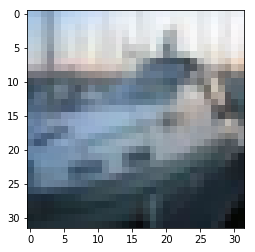

In [13]:
#airplane automobile bird cat deer dog frog horse ship truck
%matplotlib inline
import pylab

pylab.imshow(copy_x_test[2])
print("True class: ", copy_y_test[2])

cx = copy_x_test[2:3]
cy = copy_y_test[2:3]
#x_t1 , y_t1 = shape_change(copy_x_test, copy_y_test)
x_t1 , y_t1 = shape_change(cx, cy)


with tf.Session() as sess:
    sess.run(init)
    acc2 = accuracy.eval({X: x_t1, Y: y_t1})
    print(acc2)
    print(confusion_matrix.eval({X: x_t1, Y: y_t1}))

    print("Class probability: ",pred.eval({X: x_t1, Y: y_t1}))
    print("Model output ",correct_prediction.eval({X: x_t1, Y: y_t1}))

    





True class:  [0]
0.0
[[0 1]
 [0 0]]
Class probability:  [[1.2948040e-02 6.8871665e-01 1.7130747e-05 2.6229268e-02 1.1685564e-03
  2.6687539e-01 3.1375568e-03 9.0214994e-04 4.0455579e-06 1.1967248e-06]]
Model output  [False]


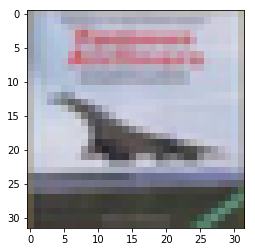

In [14]:
#airplane automobile bird cat deer dog frog horse ship truck
%matplotlib inline
import pylab

pylab.imshow(copy_x_test[3])
print("True class: ", copy_y_test[3])

cx = copy_x_test[3:4]
cy = copy_y_test[3:4]
#x_t1 , y_t1 = shape_change(copy_x_test, copy_y_test)
x_t1 , y_t1 = shape_change(cx, cy)


with tf.Session() as sess:
    sess.run(init)
    acc2 = accuracy.eval({X: x_t1, Y: y_t1})
    print(acc2)
    print(confusion_matrix.eval({X: x_t1, Y: y_t1}))

    print("Class probability: ",pred.eval({X: x_t1, Y: y_t1}))
    print("Model output ",correct_prediction.eval({X: x_t1, Y: y_t1}))


True class:  [6]
0.0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
Class probability:  [[9.9854553e-01 1.5343316e-07 1.3985431e-09 8.3431378e-10 1.4370821e-03
  7.2175023e-11 1.7080198e-05 2.6122422e-07 8.0997724e-09 4.1678154e-09]]
Model output  [False]


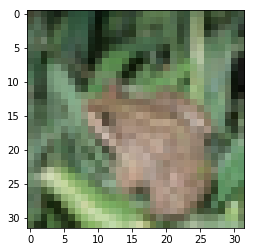

In [15]:
#airplane automobile bird cat deer dog frog horse ship truck
%matplotlib inline
import pylab

pylab.imshow(copy_x_test[4])
print("True class: ", copy_y_test[4])

cx = copy_x_test[4:5]
cy = copy_y_test[4:5]
#x_t1 , y_t1 = shape_change(copy_x_test, copy_y_test)
x_t1 , y_t1 = shape_change(cx, cy)


with tf.Session() as sess:
    sess.run(init)
    acc2 = accuracy.eval({X: x_t1, Y: y_t1})
    print(acc2)
    print(confusion_matrix.eval({X: x_t1, Y: y_t1}))

    print("Class probability: ",pred.eval({X: x_t1, Y: y_t1}))
    print("Model output ",correct_prediction.eval({X: x_t1, Y: y_t1}))


True class:  [6]
0.0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
Class probability:  [[8.74456048e-01 1.53316284e-06 5.37285954e-03 1.84592463e-05
  2.65914946e-06 1.20055586e-01 1.78878508e-07 8.47364208e-05
  1.23400568e-07 7.78246522e-06]]
Model output  [False]


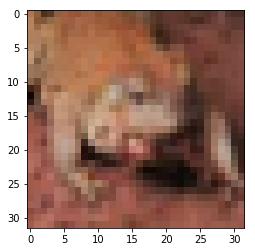

In [16]:
#airplane automobile bird cat deer dog frog horse ship truck
%matplotlib inline
import pylab

pylab.imshow(copy_x_test[5])
print("True class: ", copy_y_test[5])

cx = copy_x_test[5:6]
cy = copy_y_test[5:6]
#x_t1 , y_t1 = shape_change(copy_x_test, copy_y_test)
x_t1 , y_t1 = shape_change(cx, cy)


with tf.Session() as sess:
    sess.run(init)
    acc2 = accuracy.eval({X: x_t1, Y: y_t1})
    print(acc2)
    print(confusion_matrix.eval({X: x_t1, Y: y_t1}))

    print("Class probability: ",pred.eval({X: x_t1, Y: y_t1}))
    print("Model output ",correct_prediction.eval({X: x_t1, Y: y_t1}))
